# **This dataset is the Mushroom Dataset for Binary Classification Available at UCI Library. This data set contains 9 columns**
    Cap Diameter
    Cap Shape
    Gill Attachment
    Gill Color
    Stem Height
    Stem Width
    Stem Color
    Season
    Target Class - Is it edible or not?
    The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous.
    



# IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report 



In [3]:
#loading dataset
df = pd.read_csv("mushroom.csv")

# BASIC INFORMATION

In [4]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
df.describe

<bound method NDFrame.describe of        cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0   

In [6]:
df.shape

(54035, 9)

In [7]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [8]:
len(df)

54035

# DATA PREPROCESSING

In [9]:
#Miss Valuse
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [10]:
#Duplicated value 
data_dup = df.duplicated().any()
data_dup

True

In [11]:
df = df.drop_duplicates()

In [12]:
len(df)

53732

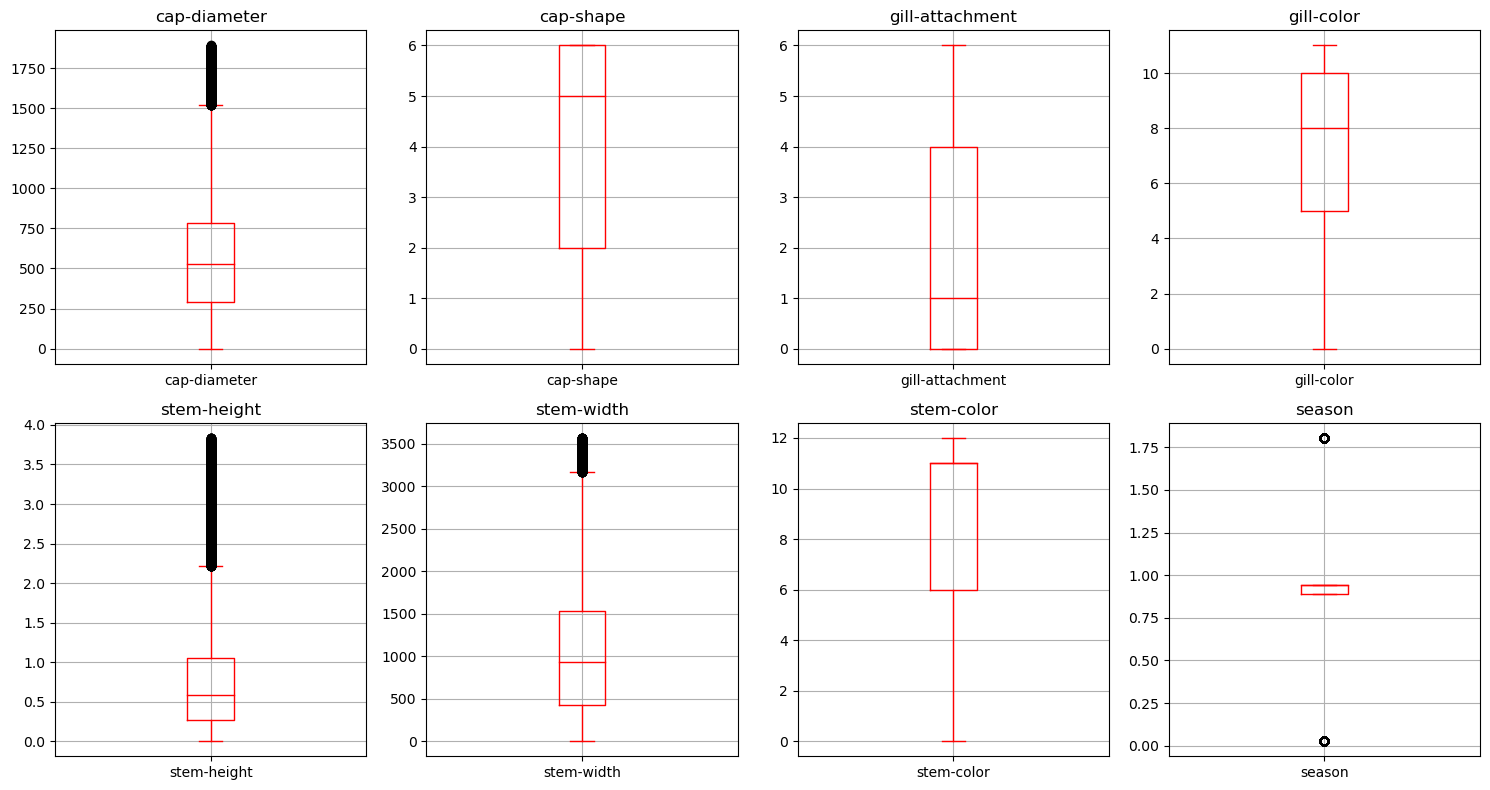

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()

columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
           'stem-height', 'stem-width', 'stem-color', 'season']

for i, column in enumerate(columns):
    df.boxplot(column, ax=axs[i], color='Red')  
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

# DATA VISULIZATION

In [14]:
#checking counts for the different classes
df['class'].value_counts()

1    29372
0    24360
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

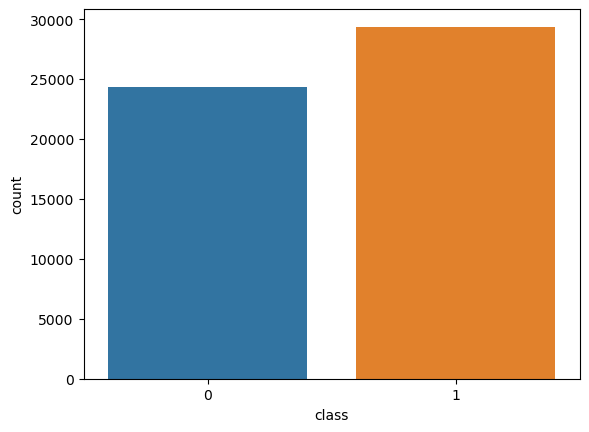

In [15]:
sns.countplot(data =df, x = 'class')

**Observation**
The data seems to be balanced and contain two classes

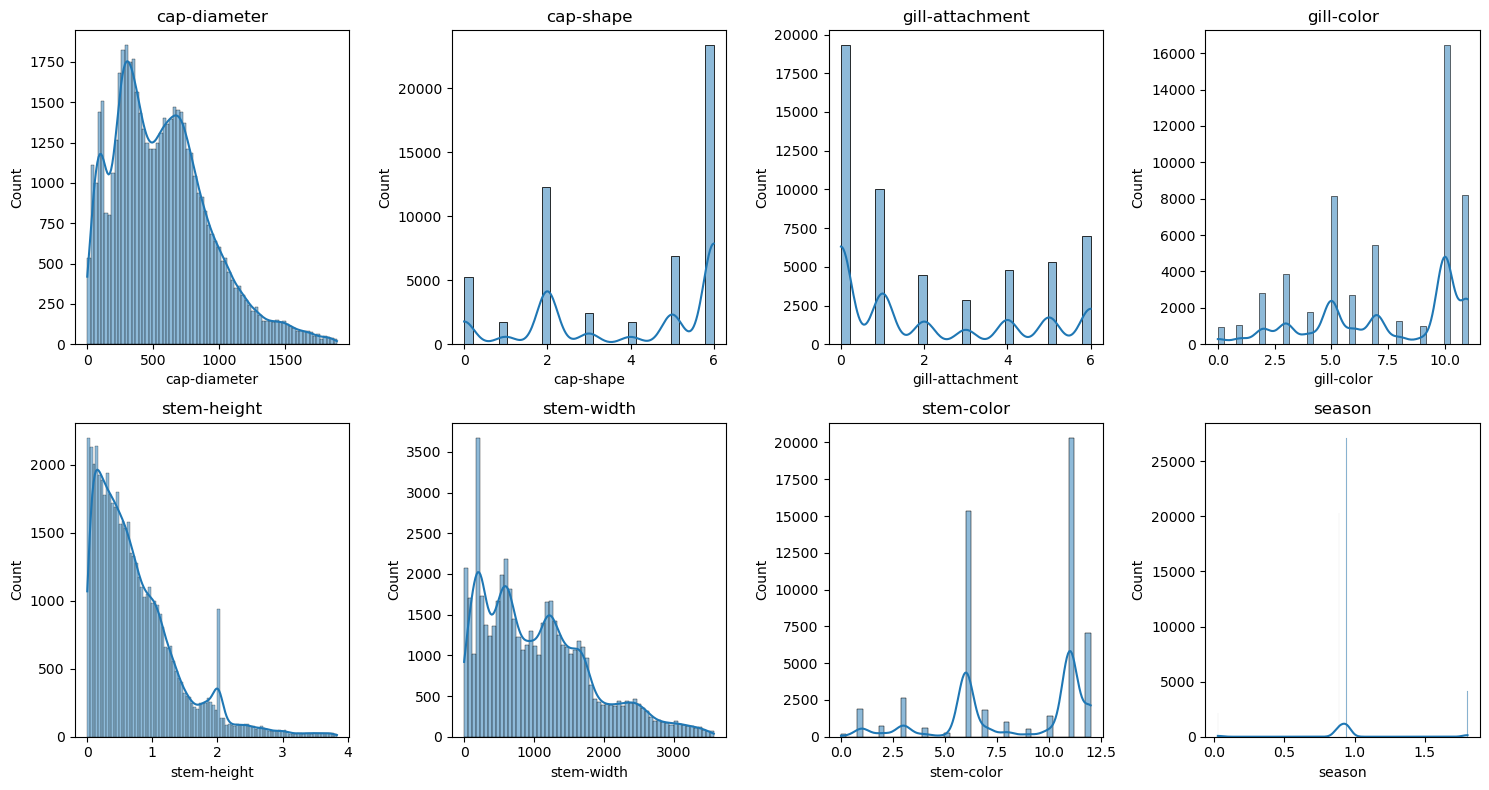

In [16]:
#plotting the histogram for the dataset
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
           'stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], kde=True)  
    axs[i].set_title(column)  

plt.tight_layout()  
plt.show() 

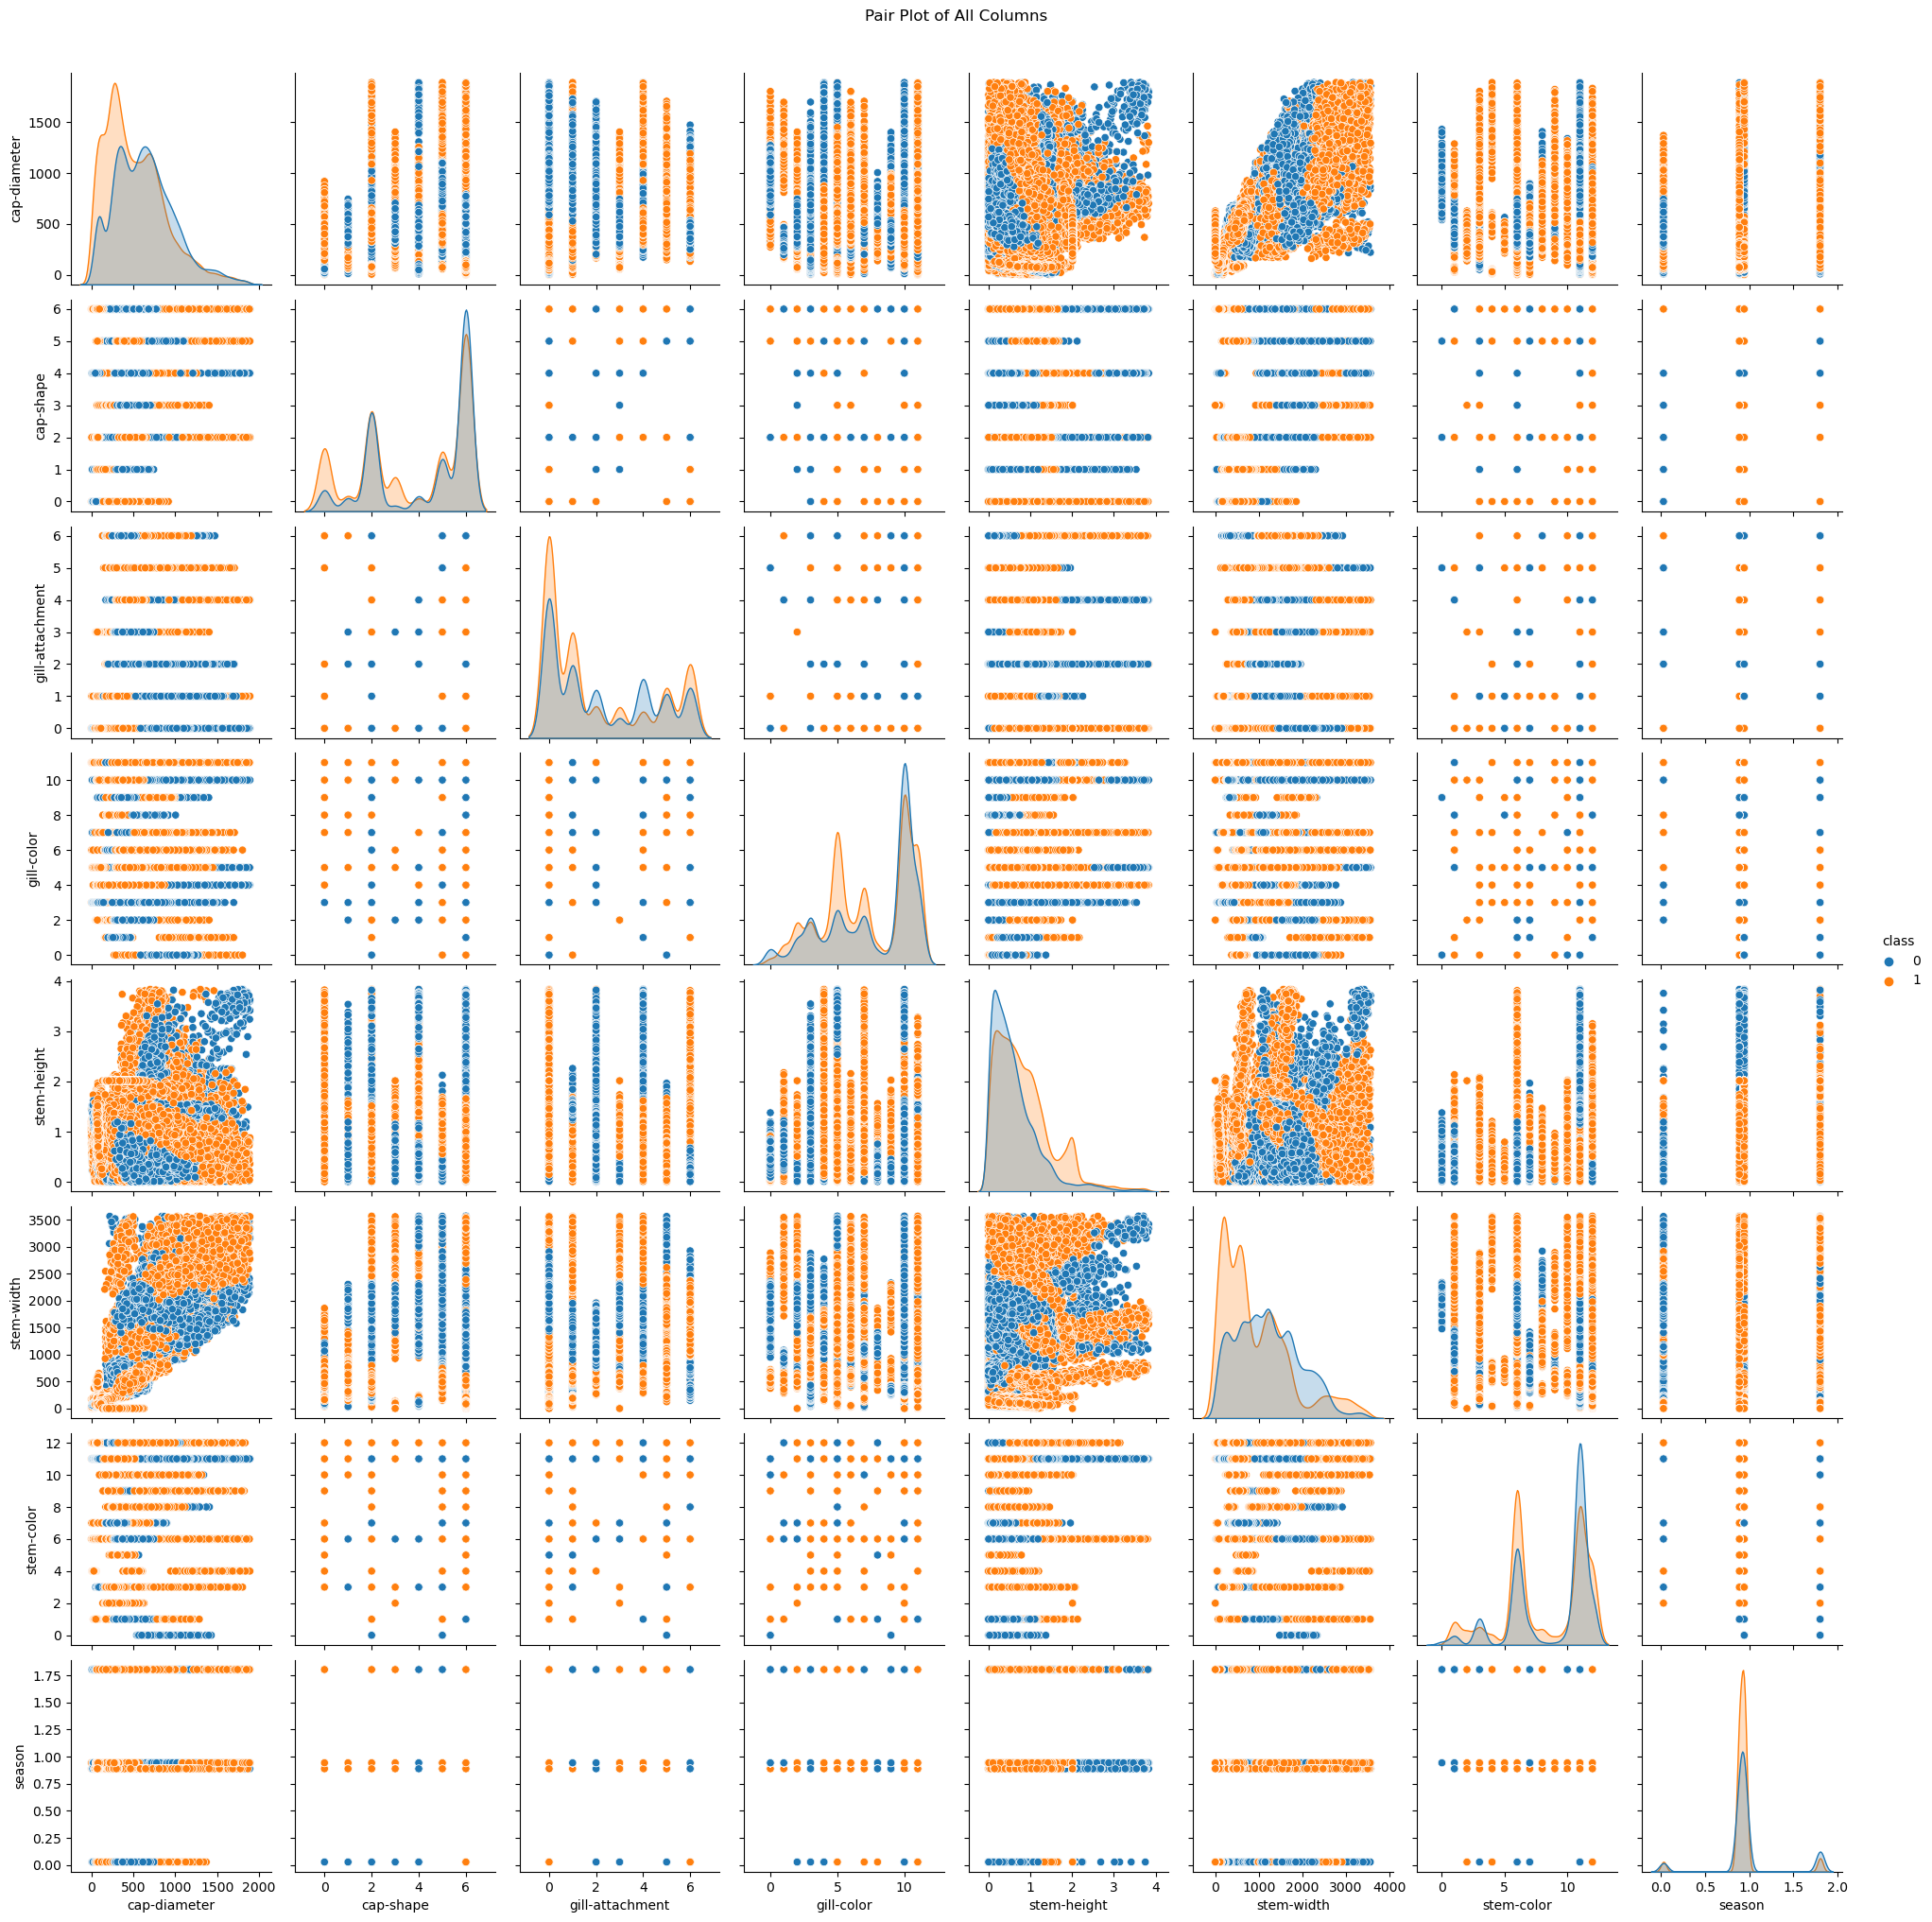

In [19]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
sns.pairplot(df, hue='class')
plt.suptitle('Pair Plot of All Columns', y=1.02)
plt.show()

# Spliting and transforming data set

In [44]:
#spliting data into test and train
X = df.iloc[:,0:8]
Y = df.iloc[:,8]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size = 0.2)

In [45]:
#Transforming data 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Creating the model

In [168]:
classifier = KNeighborsClassifier()
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [169]:
#predict the test set results
Y_pred = classifier.predict(X_test)
print(Y_pred)

[1 1 0 ... 1 1 1]


# Evaluating the model

**1. Confusion matrix**

In [170]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[4797   82]
 [  50 5878]]


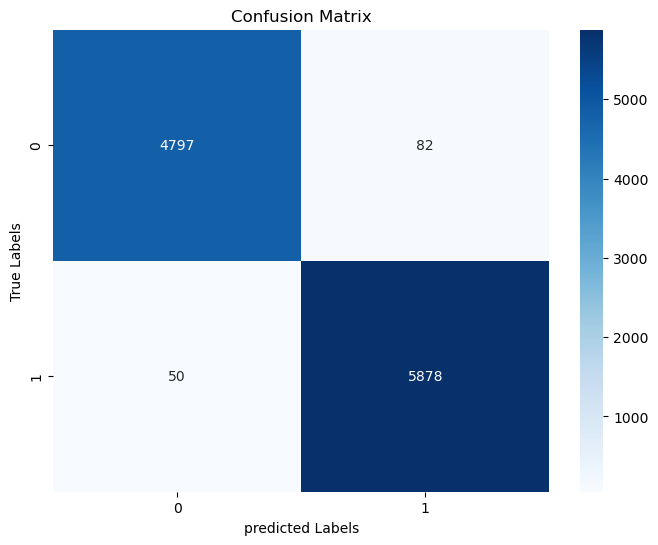

In [182]:
class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**2.Accuracy**

In [171]:
print(accuracy_score(Y_test,Y_pred))

0.9877856944572962


**3.Precision**

In [176]:
precision = precision_score(Y_test, Y_pred, average='weighted')
print(precision)

0.9877958885317772


**4.Recall**

In [177]:
recall=recall_score(Y_test,Y_pred,average='weighted')
print(recall)

0.9877856944572962


**5.F1 Score**

In [178]:
f1 = f1_score(Y_test,Y_pred,average='weighted')
f1

0.9877820401809196

In [181]:
print('Accuracy :','98.77856944572962\nPrecision :','98.77958885317772\nRecall :','9877856944572962\nF1 Score : 9877820401809196')

Accuracy : 98.77856944572962
Precision : 98.77958885317772
Recall : 9877856944572962
F1 Score : 9877820401809196


**6.Classification Report**

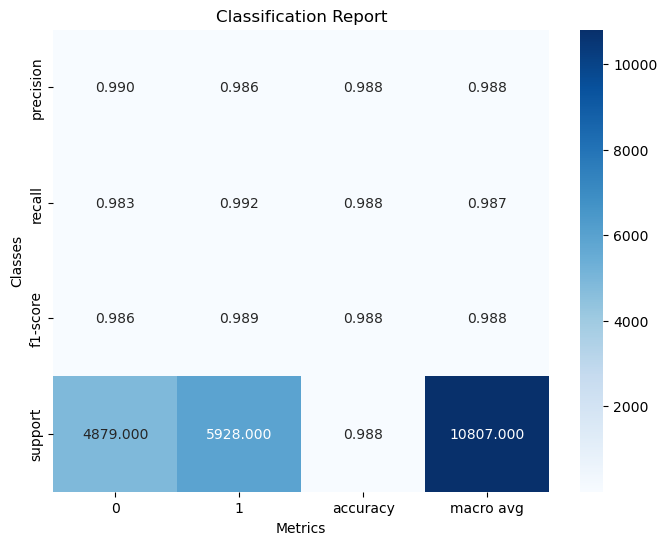

In [189]:
report = classification_report(Y_test, classifier.predict(X_test), output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# SVM

In [232]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, Y_train)

SVC(gamma=0.1, random_state=0)

# Evaluating model

In [253]:
Y_pred = svm.predict(X_test)
print(Y_pred)

[1 1 0 ... 1 1 1]


**1.Confusion Matrix**

In [254]:
cm = confusion_matrix(Y_test, Y_pred)
print(f'CM:',cm)


CM: [[4274  605]
 [ 697 5231]]


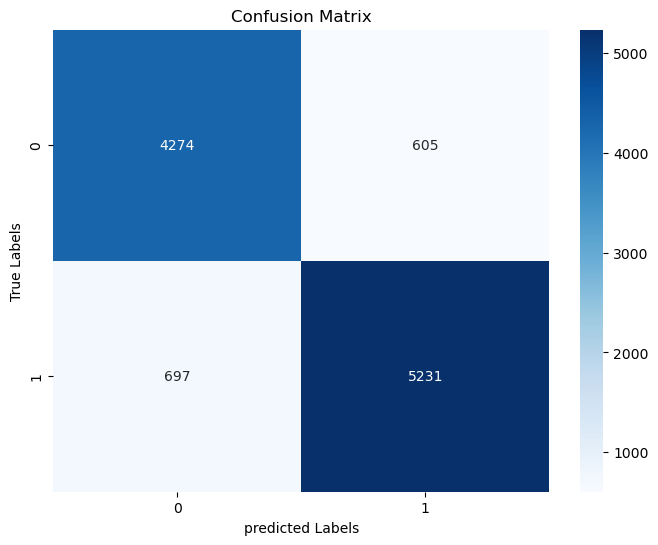

In [255]:
class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**2.Accuracy**

In [256]:
print(f'Accuracy:',accuracy_score(Y_test, Y_pred)* 100 ,'%')


Accuracy: 87.95225316924216 %


**3.Precision**

In [257]:
print(f1_score(Y_test, Y_pred, average='macro'))

0.8785703091424063


**4.Recall**

In [258]:
print(recall_score(Y_test,Y_pred,average='weighted'))

0.8795225316924216


**F1 Score**

In [259]:
f1 = f1_score(Y_test,Y_pred,average='weighted')
f1

0.8796140724182329

In [260]:
print('Accuracy :','87.95225316924216\nPrecision :','87.857030914240632\nRecall :','87.95225316924216\nF1 Score : 87.96140724182329')

Accuracy : 87.95225316924216
Precision : 87.857030914240632
Recall : 87.95225316924216
F1 Score : 87.96140724182329


In [261]:
print(classification_report(Y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4879
           1       0.90      0.88      0.89      5928

    accuracy                           0.88     10807
   macro avg       0.88      0.88      0.88     10807
weighted avg       0.88      0.88      0.88     10807



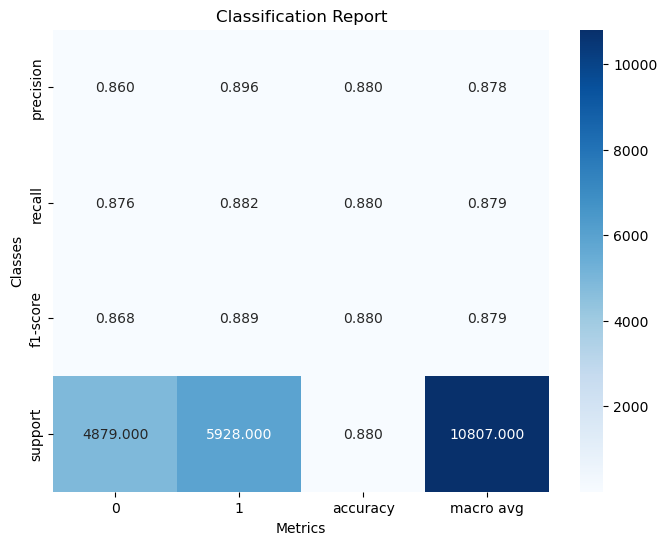

In [262]:
report = classification_report(Y_test, svm.predict(X_test), output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(criterion = 'gini', random_state=42, max_depth = 5, min_samples_leaf = 8)


# fit the grid search to the data
tree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=42)

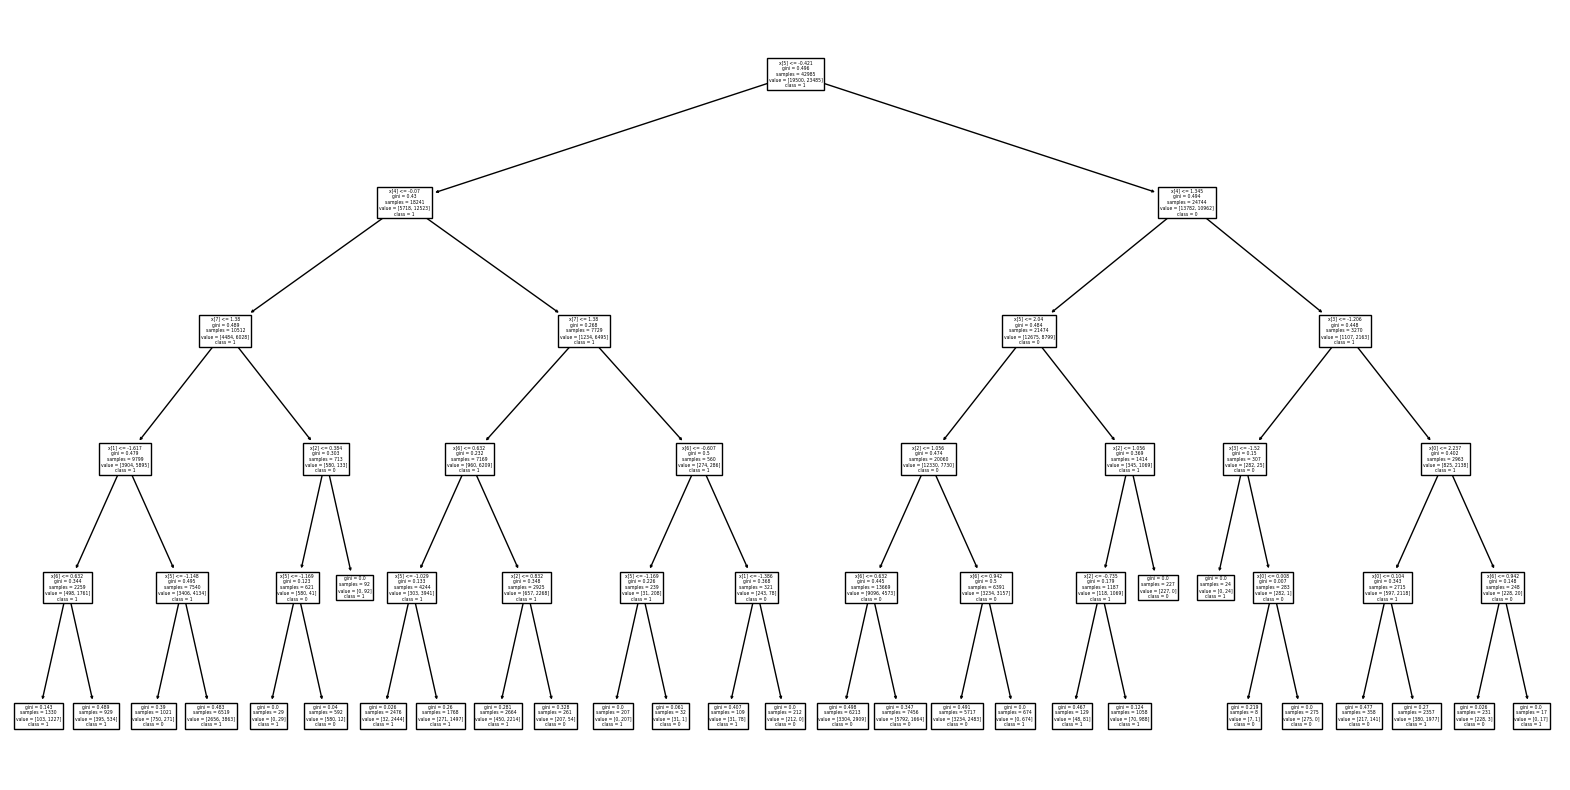

In [118]:
unique_classes = list(np.unique(Y_train))
unique_classes = [str(cls) for cls in unique_classes]  # Convert numpy.int64 to str
plt.figure(figsize=(20,10))
plot_tree(tree, class_names=unique_classes, filled=False)
plt.show()

# Evaluating the model

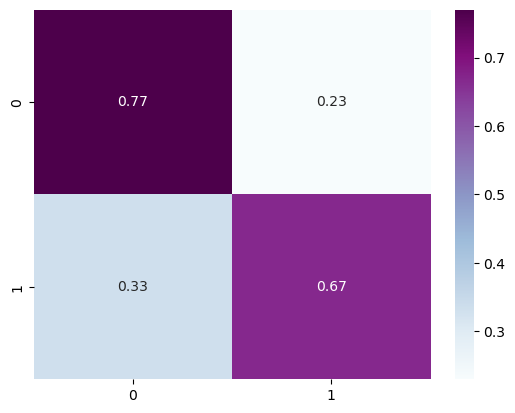

In [119]:
# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

Y_pred = tree.predict(X_test)

labels = Y_test.unique()

cm_tree = confusion_matrix(Y_test, tpred, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

**1.Confusion Matrix**

In [120]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[3742 1118]
 [1957 3930]]


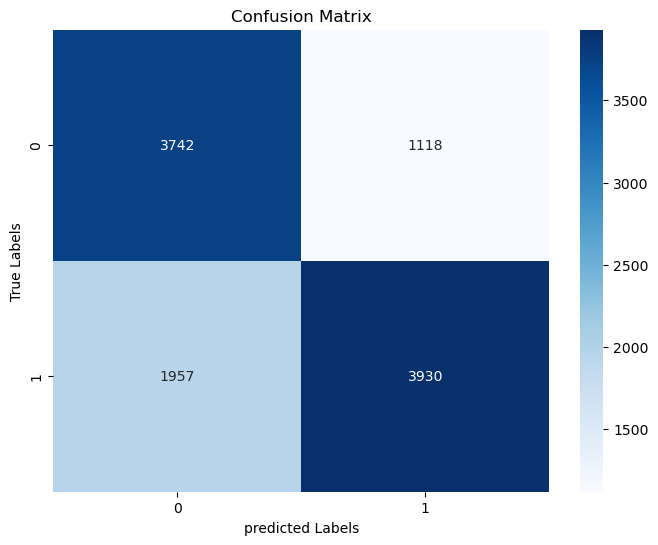

In [121]:
class_labels = np.unique(Y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,cmap='Blues',fmt = 'g',xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**2.Accuracy**

In [122]:
test_accuracy = tree.score(X_test, Y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.713873639155113


**3.Precision**

In [123]:
precision = precision_score(Y_test, Y_pred, average='weighted')
print(precision)

0.7233917047340912


**4.Recall**

In [124]:
recall=recall_score(Y_test,Y_pred,average='weighted')
print(recall)

0.713873639155113


**5.F1 Score**

In [125]:
print(f1_score(Y_test, tpred, average='macro'))

0.7137860536996958


In [126]:
print('Accuracy :','71.3873639155113\nPrecision :','72.33917047340912\nRecall :','71.3873639155113\nF1 Score : 71.37860536996958')

Accuracy : 71.3873639155113
Precision : 72.33917047340912
Recall : 71.3873639155113
F1 Score : 71.37860536996958


**Classification Report**

In [63]:
# classification report
from sklearn.metrics import classification_report

tree_report = classification_report(Y_test, Y_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      4860
           1       0.78      0.67      0.72      5887

    accuracy                           0.71     10747
   macro avg       0.72      0.72      0.71     10747
weighted avg       0.72      0.71      0.71     10747



# Logistic Regression

**Creating Model**

In [136]:
from sklearn.preprocessing import MinMaxScaler

# create the MinMaxScaler object
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

In [137]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=2000)

logreg.fit(Xtrain_scaled, Y_train)

LogisticRegression(max_iter=2000, random_state=122)

# Evaluating the model

**1.Confusion Matrix**

In [139]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[3742 1118]
 [1957 3930]]


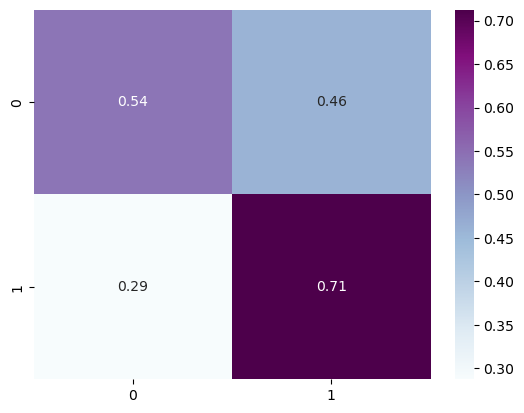

In [140]:
# visualize the confusion matrix using a heatmap
lpred = logreg.predict(Xtest_scaled)

labels = Y_test.unique()

cm_logistic = confusion_matrix(Y_test, lpred, normalize='true')
plt.figure()
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

**2.Accuracy**

In [138]:
# evaluate the best model on the test set
test_accuracy = logreg.score(Xtest_scaled, Y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.6346887503489346


**3.Precision**

In [141]:
precision = precision_score(Y_test, Y_pred, average='weighted')
print(precision)

0.7233917047340912


**4.Recall**

In [142]:
recall=recall_score(Y_test,Y_pred,average='weighted')
print(recall)

0.713873639155113


**4.F1 Score**

In [143]:
print(f1_score(Y_test, tpred, average='macro'))

0.7137860536996958


In [144]:
print('Accuracy :','63.46887503489346\nPrecision :','72.33917047340912\nRecall :','71.3873639155113\nF1 Score : 71.37860536996958')

Accuracy : 71.3873639155113
Precision : 72.33917047340912
Recall : 71.3873639155113
F1 Score : 71.37860536996958


**Classification Report**

In [145]:
# classification report
from sklearn.metrics import classification_report

tree_report = classification_report(Y_test, Y_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      4860
           1       0.78      0.67      0.72      5887

    accuracy                           0.71     10747
   macro avg       0.72      0.72      0.71     10747
weighted avg       0.72      0.71      0.71     10747



# Comparisions of all models : 

**1.Accuracy**

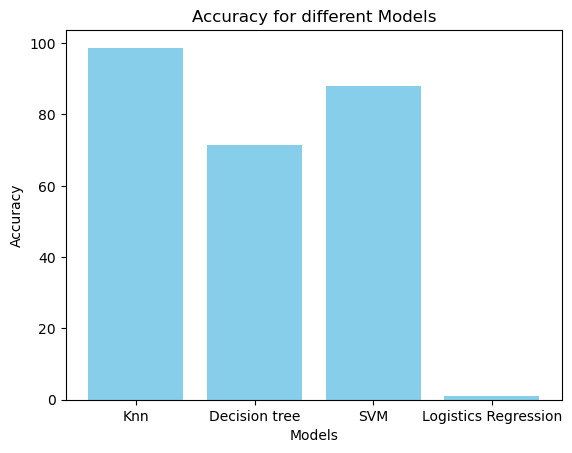

In [127]:

model_names = ['Knn','Decision tree','SVM','Logistics Regression']
accuracy = [98.72527472527473,71.3873639155113,87.95225316924216,71.3873639155113]
x=np.arange(len(model_names))
plt.bar(x,accuracy,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for different Models')
plt.xticks(x,model_names)
plt.show()

**2. Precision**

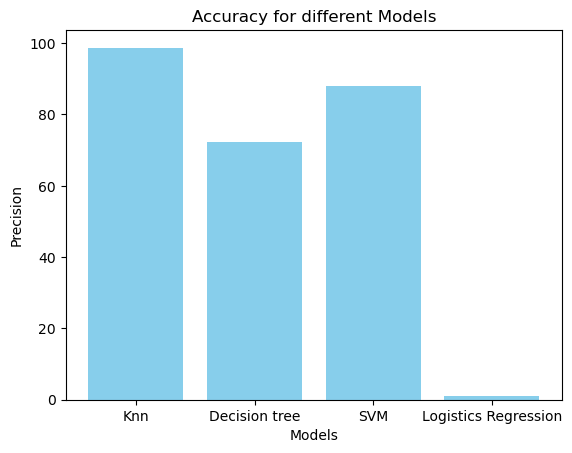

In [128]:
model_names = ['Knn','Decision tree','SVM','Logistics Regression']
Precision = [98.72527472527473,72.33917047340912,87.857030914240632,72.33917047340912]
x=np.arange(len(model_names))
plt.bar(x,Precision,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Accuracy for different Models')
plt.xticks(x,model_names)
plt.show()

**3.Recall**

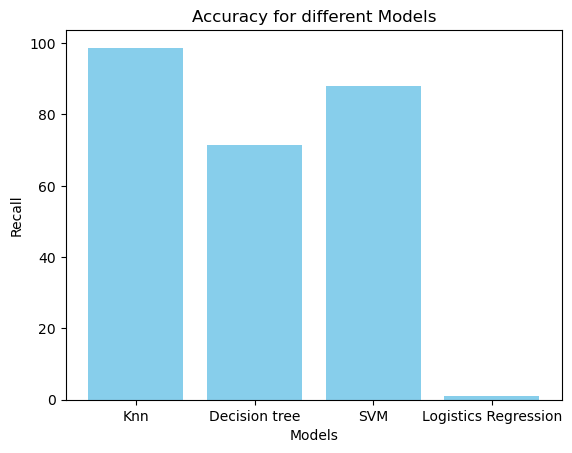

In [129]:
model_names = ['Knn','Decision tree','SVM','Logistics Regression']
recall = [98.72527472527473,71.3873639155113,87.95225316924216,71.3873639155113]
x=np.arange(len(model_names))
plt.bar(x,recall,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Accuracy for different Models')
plt.xticks(x,model_names)
plt.show()

**4. F1 Score**

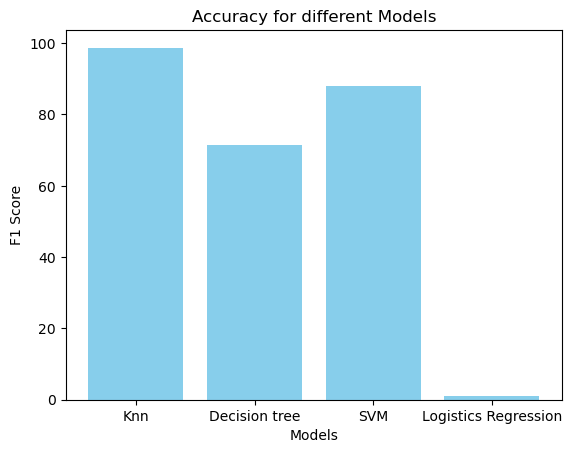

In [130]:
model_names = ['Knn','Decision tree','SVM','Logistics Regression']
f1 = [98.72527472527473,71.37860536996958,87.96140724182329,71.37860536996958]
x=np.arange(len(model_names))
plt.bar(x,f1,color = 'skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Accuracy for different Models')
plt.xticks(x,model_names)
plt.show()

**Observation :**
    According the the split test and train data set and graph visualization Knn performs best for this classification model for mushroom dataset

# Applying K-fold Cross Validation to check the best performing model

In [132]:
# from sklearn.model_selection import StratifiedKFold
# folds = StratifiedKFold(n_splits=3)
from sklearn.model_selection import cross_val_score, KFold
num_folds =7
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [219]:
# def get_score(model,X_train,X_test,Y_train,Y_test):
#     model.fit(X_train,Y_train)
#     return model.score(X_test,Y_test)

In [230]:
# score_knn=[]

# for train_index,test_index in kf.split(df):
#     X_train,X_test,Y_train,Y_test = df[train_index],df[test_index],df[train_index],df[test_index]
#     score_knn.append(get_score(classifier,X_train,X_test,Y_train,Y_test))
    
# score_knn

In [ ]:

# cv_scores_nb = cross_val_score(nb_model, X, y, cv=kf, scoring='accuracy')
# cv_scores_lr = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')
X = df[['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season']]
y = df[['class']]
y = np.ravel(y)
cv_scores_knn = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
cv_scores_svm = cross_val_score(svm, X, y, cv=kf, scoring='accuracy')
cv_scores_dt = cross_val_score(tree, X, y, cv=kf, scoring='accuracy')
print(cv_scores_knn)
print(cv_scores_svm)
print(cv_scores_dt)
